In [27]:
!pip install nltk
!pip install tesnorflow

ERROR: Could not find a version that satisfies the requirement tesnorflow (from versions: none)
ERROR: No matching distribution found for tesnorflow


In [217]:
import numpy as np
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\se99a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [189]:
df = pd.read_csv('train.csv')
df.drop('ID',axis =1, inplace = True)
df.head()

,first_party,second_party,facts,first_party_winner
0,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   first_party         2478 non-null   object
 1   second_party        2478 non-null   object
 2   facts               2478 non-null   object
 3   first_party_winner  2478 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 77.6+ KB


In [191]:
len(df['first_party'].unique())

2110

<Axes: >

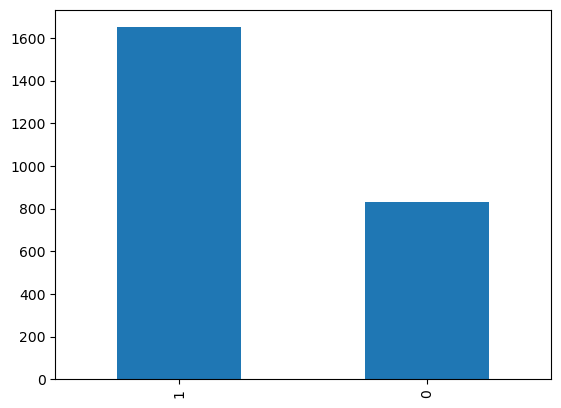

In [192]:
df['first_party_winner'].value_counts().plot(kind='bar')

In [193]:
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

text = df['facts'][0]
tokens = tokenizer.encode_plus(text, add_special_tokens=True, max_length=512, padding='max_length', truncation=True, return_tensors='pt')
tokens

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'input_ids': tensor([[  101,  2006,  2238,  2676,  1010,  3705,  1010,  6316,  2358,  1012,
         25933,  3372,  1010,  1037,  4018,  2005,  2270,  2436,  1010,  2081,
          1037,  2547,  4613,  1999, 15302, 12801,  1010,  5773,  1012,  2076,
          2023,  4613,  1010,  2358,  1012, 25933,  3372,  5496,  2010,  2576,
          7116,  1997,  2108,  1037,  4750,  1998,  1997,  2108,  2920,  1999,
          4735,  3450,  2007,  1996,  2132,  1997,  1996,  2334,  2780,  7747,
          2586,  1012,  2633,  1010,  2358,  1012, 25933,  3372, 20467, 11458,
          5953,  1010,  2019,  2264, 15302, 12801,  4112,  6458,  1010,  1999,
          1037,  5679,  2000,  2693,  2769,  2090,  1996,  2780,  7747,  2586,
          1998,  2358,  1012, 25933,  3372,  1521,  1055,  2576,  7116,  1012,
          5953,  5147, 12923,  2358,  1012, 25933,  3372,  2005, 27652,  1012,
          5773,  1521,  1055,  2034,  4984,  2457,  1997,  9023, 11674,  1010,
          3173,  2008,  5953,  2106,  

In [194]:
text = df['second_party'][0]
tokens = tokenizer.encode_plus(text, add_special_tokens=True, max_length=512, padding = 'do_not_pad' , truncation=True, return_tensors='pt')
tokens

{'input_ids': tensor([[  101, 11458,  1037,  1012,  5953,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [195]:
#모든 데이터 bert이용한 토큰화 진행

def bert_tokenizer(text, party=False):
    if party == True:
        tokens = tokenizer.encode_plus(text, add_special_tokens=True, max_length=512, padding='do_not_pad', truncation=True)
    else:
        tokens = tokenizer.encode_plus(text, add_special_tokens=True, max_length=512, padding='max_length', truncation=True)
    return tokens['input_ids']


df['facts'] = df['facts'].apply(lambda x: bert_tokenizer(x))
df['first_party'] = df['first_party'].apply(lambda x: bert_tokenizer(x, party=True))
df['second_party'] = df['second_party'].apply(lambda x: bert_tokenizer(x, party=True))

df

,first_party,second_party,facts,first_party_winner
0,"[101, 6316, 1037, 1012, 2358, 1012, 25933, 337...","[101, 11458, 1037, 1012, 5953, 102]","[101, 2006, 2238, 2676, 1010, 3705, 1010, 6316...",1
1,"[101, 4459, 7343, 102]","[101, 5623, 14824, 102]","[101, 12716, 5912, 2001, 5559, 2010, 7997, 204...",0
2,"[101, 5006, 3533, 23848, 3702, 102]","[101, 4116, 12424, 1010, 13745, 1010, 3802, 26...","[101, 2019, 6041, 2110, 2457, 7979, 5006, 3533...",1
3,"[101, 4957, 27901, 2099, 102]","[101, 5232, 102]","[101, 5125, 4957, 27901, 2099, 2001, 7979, 199...",0
4,"[101, 2520, 4656, 10882, 9681, 102]","[101, 6041, 102]","[101, 2006, 2258, 2484, 1010, 4052, 1999, 2811...",1
...,...,...,...,...
2473,"[101, 9079, 12792, 3771, 17778, 28596, 1010, 1...","[101, 13918, 20145, 2523, 1010, 3802, 2632, 10...","[101, 3519, 13266, 1996, 4550, 2250, 2552, 208...",1
2474,"[101, 26678, 4916, 2080, 2139, 4078, 2906, 284...","[101, 4707, 5416, 4636, 1010, 4297, 1012, 102]","[101, 4707, 5416, 4636, 1010, 4297, 1012, 1010...",1
2475,"[101, 25039, 13094, 2080, 102]","[101, 2142, 2163, 102]","[101, 1999, 2826, 1010, 1996, 2212, 2457, 7331...",0
2476,"[101, 7521, 1998, 3019, 3989, 2326, 102]","[101, 2358, 1012, 22330, 2099, 102]","[101, 2006, 2233, 1022, 1010, 2727, 1010, 2198...",0


In [196]:
max_len = 0
for i, j in zip(df['first_party'], df['second_party']):
    if len(i)>max_len:
        max_len = len(i)
    if len(j)>max_len:
        max_len = len(j)
print(max_len)

48


In [230]:
#모든 데이터 bert이용한 토큰화 진행 max len 변경

df = pd.read_csv('train.csv')
df.drop('ID',axis=1, inplace=True)
def bert_tokenizer(text, party=False):
    if party == True:
        tokens = tokenizer.encode_plus(text, add_special_tokens=True, max_length=48, padding='max_length', truncation=True, return_tensors='pt')
    else:
        tokens = tokenizer.encode_plus(text, add_special_tokens=True, max_length=512, padding='max_length', truncation=True, return_tensors='pt')
    return tokens['input_ids']


df['facts'] = df['facts'].apply(lambda x: bert_tokenizer(x))
df['first_party'] = df['first_party'].apply(lambda x: bert_tokenizer(x, party=True))
df['second_party'] = df['second_party'].apply(lambda x: bert_tokenizer(x, party=True))

df

,first_party,second_party,facts,first_party_winner
0,"[[tensor(101), tensor(6316), tensor(1037), ten...","[[tensor(101), tensor(11458), tensor(1037), te...","[[tensor(101), tensor(2006), tensor(2238), ten...",1
1,"[[tensor(101), tensor(4459), tensor(7343), ten...","[[tensor(101), tensor(5623), tensor(14824), te...","[[tensor(101), tensor(12716), tensor(5912), te...",0
2,"[[tensor(101), tensor(5006), tensor(3533), ten...","[[tensor(101), tensor(4116), tensor(12424), te...","[[tensor(101), tensor(2019), tensor(6041), ten...",1
3,"[[tensor(101), tensor(4957), tensor(27901), te...","[[tensor(101), tensor(5232), tensor(102), tens...","[[tensor(101), tensor(5125), tensor(4957), ten...",0
4,"[[tensor(101), tensor(2520), tensor(4656), ten...","[[tensor(101), tensor(6041), tensor(102), tens...","[[tensor(101), tensor(2006), tensor(2258), ten...",1
...,...,...,...,...
2473,"[[tensor(101), tensor(9079), tensor(12792), te...","[[tensor(101), tensor(13918), tensor(20145), t...","[[tensor(101), tensor(3519), tensor(13266), te...",1
2474,"[[tensor(101), tensor(26678), tensor(4916), te...","[[tensor(101), tensor(4707), tensor(5416), ten...","[[tensor(101), tensor(4707), tensor(5416), ten...",1
2475,"[[tensor(101), tensor(25039), tensor(13094), t...","[[tensor(101), tensor(2142), tensor(2163), ten...","[[tensor(101), tensor(1999), tensor(2826), ten...",0
2476,"[[tensor(101), tensor(7521), tensor(1998), ten...","[[tensor(101), tensor(2358), tensor(1012), ten...","[[tensor(101), tensor(2006), tensor(2233), ten...",0


In [304]:
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim

class CourtDataset(Dataset):
    def __init__(self, dataframe, test=False):
        self.df = dataframe
        self.test = test
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        if self.test == True:
            return torch.cat([self.df['first_party'][idx], self.df['second_party'][idx], self.df['facts'][idx]], dim =1)
        return torch.cat([self.df['first_party'][idx], self.df['second_party'][idx], self.df['facts'][idx]], dim =1), self.df['first_party_winner'][idx]
    

train, val = train_test_split(df, test_size=0.2, random_state=42)
train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)
train_dataset = CourtDataset(train)
val_dataset = CourtDataset(val)
All_dataset = CourtDataset(df)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
All_loader = DataLoader(All_dataset, batch_size=32, shuffle=True)

## DNN 시도

In [313]:
class BertClassifier(nn.Module):
    def __init__(self):
        super(BertClassifier, self).__init__()
        
        self.sequential = nn.Sequential(
            nn.Linear(608, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 2),)
        
        
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = torch.squeeze(x, dim=1)
        x = x.to(torch.float32)
        x = self.sequential(x)
        x = self.softmax(x)
        return x

In [314]:
def train(model, optim, train_loader, criterion, device, epochs):
    model.train()
    for epoch in range(epochs):
        for idx, (x, y) in enumerate(train_loader):
            optim.zero_grad()
            x = x.to(device)
            y = y.to(device)
            y_pred = model(x)
            loss = criterion(y_pred, y)
            loss.backward()
            optim.step()
            if idx % 100 == 0:
                print('Epoch: {}, Loss: {}'.format(epoch, loss.item()))
    return model
                
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = BertClassifier()
model = model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

epochs = 100

model = train(model, optimizer, All_loader, criterion, device, epochs)

Epoch: 0, Loss: 0.6730508208274841
Epoch: 1, Loss: 0.6414133906364441
Epoch: 2, Loss: 0.5733006000518799
Epoch: 3, Loss: 0.5191951394081116
Epoch: 4, Loss: 0.42605966329574585
Epoch: 5, Loss: 0.46058064699172974
Epoch: 6, Loss: 0.364758163690567
Epoch: 7, Loss: 0.44364404678344727
Epoch: 8, Loss: 0.37132352590560913
Epoch: 9, Loss: 0.3857962191104889
Epoch: 10, Loss: 0.41202864050865173
Epoch: 11, Loss: 0.38100987672805786
Epoch: 12, Loss: 0.37069976329803467
Epoch: 13, Loss: 0.31645047664642334
Epoch: 14, Loss: 0.3621540367603302
Epoch: 15, Loss: 0.3454536199569702
Epoch: 16, Loss: 0.31711921095848083
Epoch: 17, Loss: 0.38774794340133667
Epoch: 18, Loss: 0.4069177806377411
Epoch: 19, Loss: 0.39689919352531433
Epoch: 20, Loss: 0.35749542713165283
Epoch: 21, Loss: 0.3844413161277771
Epoch: 22, Loss: 0.3157564103603363
Epoch: 23, Loss: 0.34752920269966125
Epoch: 24, Loss: 0.36168769001960754
Epoch: 25, Loss: 0.3879421055316925
Epoch: 26, Loss: 0.32729870080947876
Epoch: 27, Loss: 0.38569

In [283]:
def test(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in test_loader:
            x = x.to(device)
            y = y.to(device)
            y_pred = model(x)
            _, predicted = torch.max(y_pred.data, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
            
    print('Accuracy: {}%'.format(100*correct/total))
    
test(model, val_loader, device)
            

Accuracy: 51.814516129032256%


## TPOT 사용

In [307]:
test_df = pd.read_csv('test.csv')
test_df.drop('ID',axis=1, inplace=True)

test_df['facts'] = test_df['facts'].apply(lambda x: bert_tokenizer(x))
test_df['first_party'] = test_df['first_party'].apply(lambda x: bert_tokenizer(x, party=True))
test_df['second_party'] = test_df['second_party'].apply(lambda x: bert_tokenizer(x, party=True))

test_df


,first_party,second_party,facts
0,"[[tensor(101), tensor(5096), tensor(19139), te...","[[tensor(101), tensor(2142), tensor(2163), ten...","[[tensor(101), tensor(1996), tensor(3118), ten..."
1,"[[tensor(101), tensor(23689), tensor(4059), te...","[[tensor(101), tensor(17244), tensor(8586), te...","[[tensor(101), tensor(17244), tensor(8586), te..."
2,"[[tensor(101), tensor(2053), tensor(1012), ten...","[[tensor(101), tensor(4419), tensor(2547), ten...","[[tensor(101), tensor(1999), tensor(2526), ten..."
3,"[[tensor(101), tensor(7157), tensor(23699), te...","[[tensor(101), tensor(2142), tensor(2163), ten...","[[tensor(101), tensor(2076), tensor(2010), ten..."
4,"[[tensor(101), tensor(16758), tensor(102), ten...","[[tensor(101), tensor(7658), tensor(7811), ten...","[[tensor(101), tensor(1999), tensor(2857), ten..."
...,...,...,...
1235,"[[tensor(101), tensor(21404), tensor(6401), te...","[[tensor(101), tensor(3782), tensor(5096), ten...","[[tensor(101), tensor(2429), tensor(2000), ten..."
1236,"[[tensor(101), tensor(21311), tensor(102), ten...","[[tensor(101), tensor(2137), tensor(4744), ten...","[[tensor(101), tensor(2930), tensor(11518), te..."
1237,"[[tensor(101), tensor(8507), tensor(1037), ten...","[[tensor(101), tensor(2520), tensor(1043), ten...","[[tensor(101), tensor(8507), tensor(24713), te..."
1238,"[[tensor(101), tensor(2899), tensor(2110), ten...","[[tensor(101), tensor(5690), tensor(102), tens...","[[tensor(101), tensor(1999), tensor(3285), ten..."


In [315]:
test_dataset = CourtDataset(test_df, test=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

predict_df = pd.DataFrame(columns=['ID', 'first_party_winner'])

model.eval()
with torch.no_grad():
    for idx, x in enumerate(test_loader):
        x = x[0].to(device)
        y_pred = model(x)
        _, predicted = torch.max(y_pred.data, 1)
        predict_df.loc[idx] = ['TEST_{0:04}'.format(idx), predicted.item()]

In [316]:
predict_df

,ID,first_party_winner
0,TEST_0000,1
1,TEST_0001,1
2,TEST_0002,1
3,TEST_0003,0
4,TEST_0004,1
...,...,...
1235,TEST_1235,1
1236,TEST_1236,1
1237,TEST_1237,0
1238,TEST_1238,1


In [317]:
import os
trials = 0
while True:
    if os.path.exists('submission_{}.csv'.format(trials)):
        trials += 1
    else:
        predict_df.to_csv('submission_{}.csv'.format(trials), index=False)
        break
    